# Proyek Analisis Data: [Bike Sharing Dataset]
- **Nama:** [Putri Sekar Ayu]
- **Email:** [putrisekarayuuu@gmail.com]
- **ID Dicoding:** [putrisekarayuuu]

## Menentukan Pertanyaan Bisnis

- Bagaimana pola jumlah penyewaan sepeda berdasarkan hari dan jam tertentu?
- Bagaimana proporsi antara registered users dan casual users dalam penyewaan sepeda?
- Bagaimana tren perfoma penyewaan sepeda dalam dua tahun terakhir (2011-2013)?
- Bagaimana hubungan antara faktor cuaca terhadap jumlah penyewaan sepeda?

## Import Semua Packages/Library yang Digunakan

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

In [86]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
os.chdir('/content/drive/MyDrive/Laskar AI')

### Gathering Data

In [87]:
day = pd.read_csv('day.csv')
hour = pd.read_csv('hour.csv')

### Assessing Data

#### a. Cek Kewajaran Data Melalui Statistik Deskriptif

In [93]:
# Memastikan tampilan tabel stat deskriptif tertampilkan untuk semua var
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

In [94]:
# Statistik deskriptif df day
day.describe(include = "all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,NaN,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,NaN,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,NaN,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,NaN,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000


In [95]:
# Statistik deskriptif df hour
hour.describe(include = "all")

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,temp_category
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,0.0,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,0
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
top,NaN,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,NaN,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,NaN,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088,NaN
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,NaN,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599,NaN
min,1.0000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,NaN
25%,4345.5000,NaN,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,NaN,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000,NaN
50%,8690.0000,NaN,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,NaN,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000,NaN
75%,13034.5000,NaN,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,NaN,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000,NaN


**Keterangan:**
- Rentang nilai untuk setiap variabel berada dalam batas wajar. Tidak ditemukan anomali, seperti jumlah penyewa yang negatif atau nilai bulan di luar rentang yang seharusnya.

#### b. Cek Informasi Datatype Variabel

In [ ]:
# Info datatype day
day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [ ]:
# Info datatype hour
hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


**Keterangan:**
- Tidak ada nilai null / missing value
- dteday sebaiknya diubah menjadi tipe data yang lebih sesuai (date time)

#### c. Cek Duplikasi Data

In [ ]:
# Cek duplikasi data
print(f'Jumlah duplikasi data dalam df day: {day.duplicated().sum()}')
print(f'Jumlah duplikasi data dalam df hour: {hour.duplicated().sum()}')

Jumlah duplikasi data dalam df day: 0
Jumlah duplikasi data dalam df hour: 0


**Keterangan:**
- Tidak ada data duplikat

### Cleaning Data

#### a. Dropping Variabel yang tidak diperlukan

Berdasarkan hasil pemeriksaan sebelumnya, tidak ditemukan adanya anomali dalam data. Oleh karena itu, tahap pembersihan data akan difokuskan pada penghapusan variabel yang tidak relevan dalam menjawab pertanyaan bisnis yang telah disusun sebelumnya.

In [ ]:
# Cleaning variabel instant yang tidak diperlukan
day.drop('instant', axis=1, inplace=True)
hour.drop('instant', axis=1, inplace=True)

In [ ]:
# Ubah tipe data dteday menjadi date time
day['dteday'] = pd.to_datetime(day['dteday'])
hour['dteday'] = pd.to_datetime(hour['dteday'])

In [ ]:
# Checking dteday
day.info()
hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   dteday      731 non-null    datetime64[ns]
 1   season      731 non-null    int64         
 2   yr          731 non-null    int64         
 3   mnth        731 non-null    int64         
 4   holiday     731 non-null    int64         
 5   weekday     731 non-null    int64         
 6   workingday  731 non-null    int64         
 7   weathersit  731 non-null    int64         
 8   temp        731 non-null    float64       
 9   atemp       731 non-null    float64       
 10  hum         731 non-null    float64       
 11  windspeed   731 non-null    float64       
 12  casual      731 non-null    int64         
 13  registered  731 non-null    int64         
 14  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), float64(4), int64(10)
memory usage: 85.8 KB
<class '

#### b. Mapping Variabel Season dan Weather Situation

Pada format aslinya, variabel season dan weather situation disimpan dalam bentuk variabel nominal yang dilabeli dengan angka 1-4, untuk memudahkan proses analisis kita akan membuat variabel baru dengan pelabelan nama yang lebih jelas

In [ ]:
# Mapping angka ke nama musim
season_mapping = {1: "Spring", 2: "Summer", 3: "Fall", 4: "Winter"}

# Buat variabel baru di DataFrame hour dan day
hour["season_label"] = hour["season"].map(season_mapping)
day["season_label"] = day["season"].map(season_mapping)

In [ ]:
weather_mapping = {
    1: "Clear/Partly Cloudy",
    2: "Mist/Cloudy",
    3: "Light Rain/Snow",
    4: "Heavy Rain/Snow/Thunderstorm"
}

hour["weathersit_name"] = hour["weathersit"].map(weather_mapping)
day["weathersit_name"] = day["weathersit"].map(weather_mapping)

#### c. Subsetting Dataframe Hour untuk Analisis Korelasi (Pertanyaan 4)

In [ ]:
# Subsetting variabel count, temp, atemp, hum, windspeed
hour_subset = hour[['cnt', 'temp', 'atemp', 'hum', 'windspeed']]

In [ ]:
hour_subset.head(10)

,cnt,temp,atemp,hum,windspeed
0,16,0.24,0.2879,0.81,0.0000
1,40,0.22,0.2727,0.80,0.0000
2,32,0.22,0.2727,0.80,0.0000
3,13,0.24,0.2879,0.75,0.0000
4,1,0.24,0.2879,0.75,0.0000
5,1,0.24,0.2576,0.75,0.0896
6,2,0.22,0.2727,0.80,0.0000
7,3,0.20,0.2576,0.86,0.0000
8,8,0.24,0.2879,0.75,0.0000
9,14,0.32,0.3485,0.76,0.0000


## Exploratory Data Analysis (EDA)

### Explore Proporsi antara Registered Users dan Casual Users dalam Penyewaan Sepeda

In [ ]:
# Tabel proporsi frekuensi penyewaan sepeda antara kategori Registered Users dan Casual Users
users_frequency_prop = hour[['casual', 'registered']].sum() / hour['cnt'].sum()
users_frequency_prop = users_frequency_prop.to_frame().rename(columns={0: 'Proportion'})
print(users_frequency_prop)

            Proportion
casual        0.188302
registered    0.811698


In [ ]:
# Tabel proporsi jumlah Registeres Users dan Casual Users

unique_users_count = hour[['casual', 'registered']].nunique()
unique_users_prop = unique_users_count / unique_users_count.sum()
unique_users_prop = unique_users_prop.to_frame().rename(columns={0: 'Proportion'})

# Menampilkan tabel proporsi
print(unique_users_prop)

            Proportion
casual         0.29326
registered     0.70674


### Explore Korelasi Data Temperature dan Jumlah Penyewa

Langkah ini dilakukan sebagai tahap awal dalam menjawab pertanyaan keempat mengenai pengaruh data faktor lingkungan terhadap jumlah penyewa. Secara umum, sebelum menganalisis pengaruh, kita perlu terlebih dahulu melihat korelasi antara variabel yang akan dimodelkan.

In [ ]:
# Korelasi antara variabel-variabel faktor lingkungan dan jumlah penyewa
weather_and_count_corr = hour_subset.corr()
print(weather_and_count_corr)

                cnt      temp     atemp       hum  windspeed
cnt        1.000000  0.404772  0.400929 -0.322911   0.093234
temp       0.404772  1.000000  0.987672 -0.069881  -0.023125
atemp      0.400929  0.987672  1.000000 -0.051918  -0.062336
hum       -0.322911 -0.069881 -0.051918  1.000000  -0.290105
windspeed  0.093234 -0.023125 -0.062336 -0.290105   1.000000


**Insight:**
- Variabel-variabel terpilih temp, atemp, hum, dan windspeed berkorelasi rendah hingga sedang terhadap count/jumlah penyewa.
- Variabel temp, atemp, dan windspeed berkorelasi positif dengan count
- Sedangkan pada variabel hum berkorelasi negatif dengan count

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana pola jumlah penyewaan sepeda berdasarkan hari dan jam tertentu?

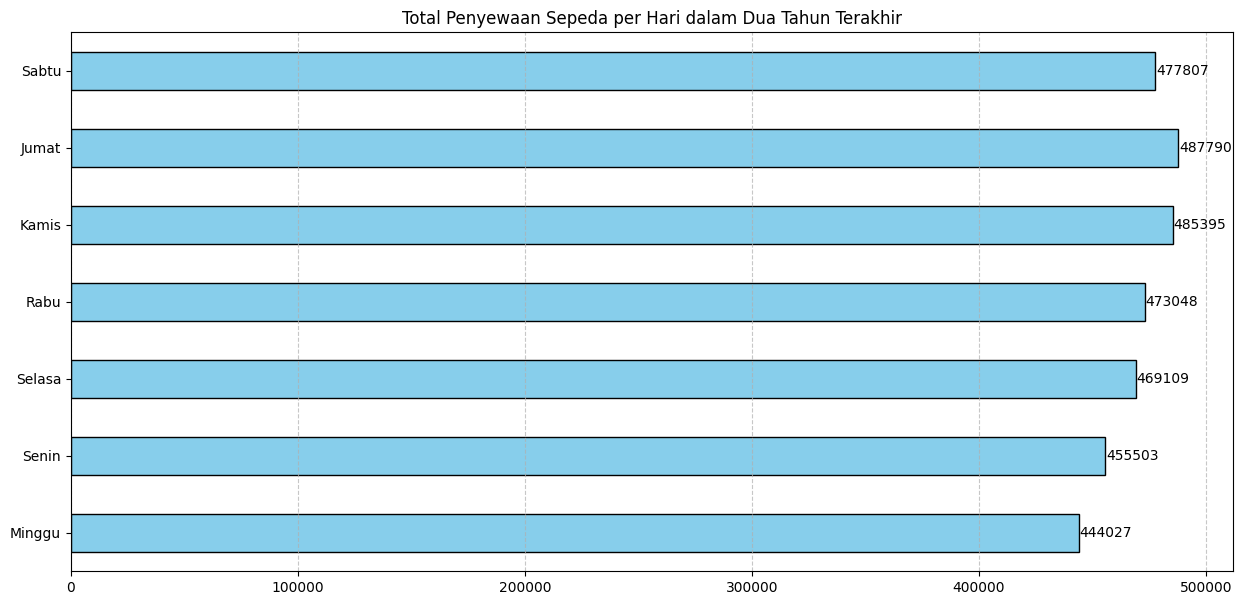

In [ ]:
# Menghitung total penyewaan sepeda untuk setiap hari dalam seminggu
total_per_weekday = hour.groupby("weekday")["cnt"].sum()

# Mapping nama hari (0 = Minggu, 6 = Sabtu)
days_mapping = {0: "Minggu", 1: "Senin", 2: "Selasa", 3: "Rabu", 4: "Kamis", 5: "Jumat", 6: "Sabtu"}
total_per_weekday.index = total_per_weekday.index.map(days_mapping)

# Pastikan urutan hari tetap Minggu → Sabtu
order = ["Minggu", "Senin", "Selasa", "Rabu", "Kamis", "Jumat", "Sabtu"]
total_per_weekday = total_per_weekday.reindex(order)

# Visualisasi dengan horizontal bar chart
plt.figure(figsize=(15, 7))
ax = total_per_weekday.plot(kind="barh", color="skyblue", edgecolor="black")

# Menambahkan label jumlah penyewaan di setiap bar
for index, value in enumerate(total_per_weekday):
    plt.text(value + 500, index, str(value), va="center", fontsize=10)  # Sesuaikan posisi label

plt.xlabel("")  # Menghapus label sumbu X
plt.ylabel("")  # Menghapus label sumbu Y
plt.title("Total Penyewaan Sepeda per Hari dalam Dua Tahun Terakhir")
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.show()


**Interpretasi :** Dalam dua tahun terakhir, jumlah penyewaan sepeda paling banyak ada di hari Kamis dan Jumat, dimana hari Kamis mencapai 485.395 penyewaan secara keseluruhan dalam 2 tahun terakhir sedangkan Jumat mencapai 487.790 secara keseluruhan.

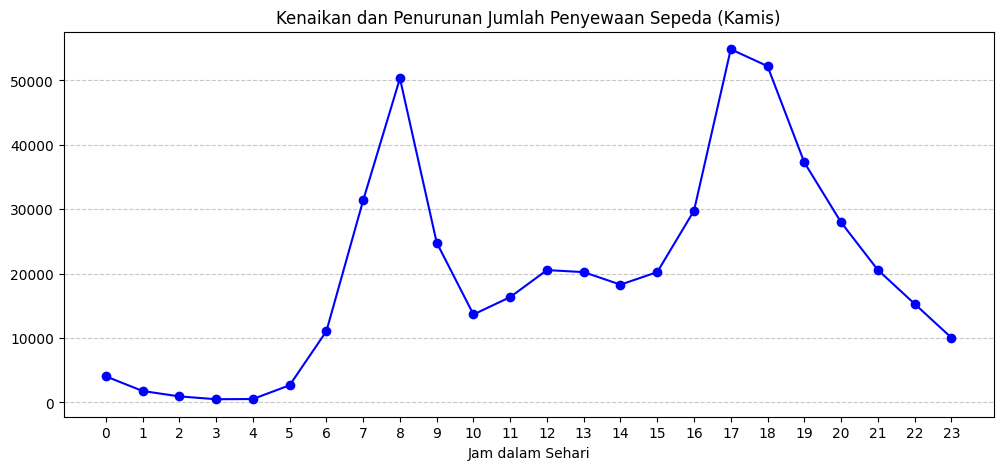

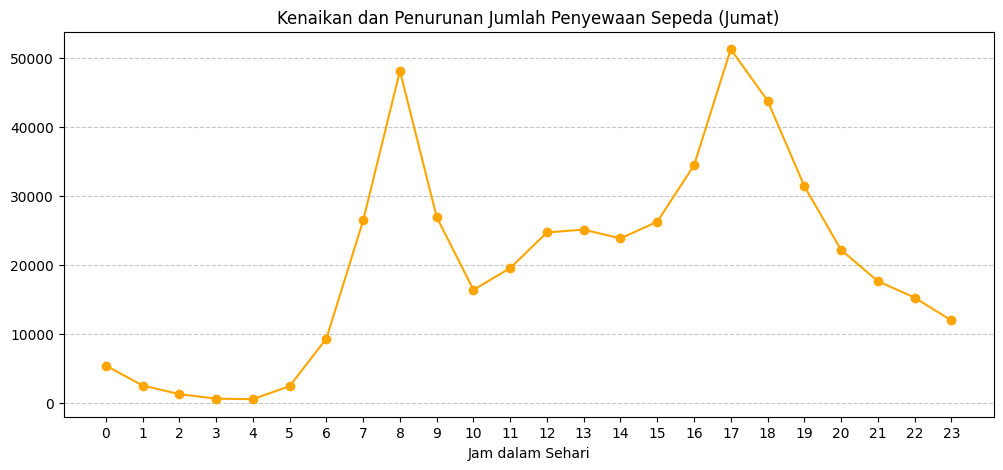

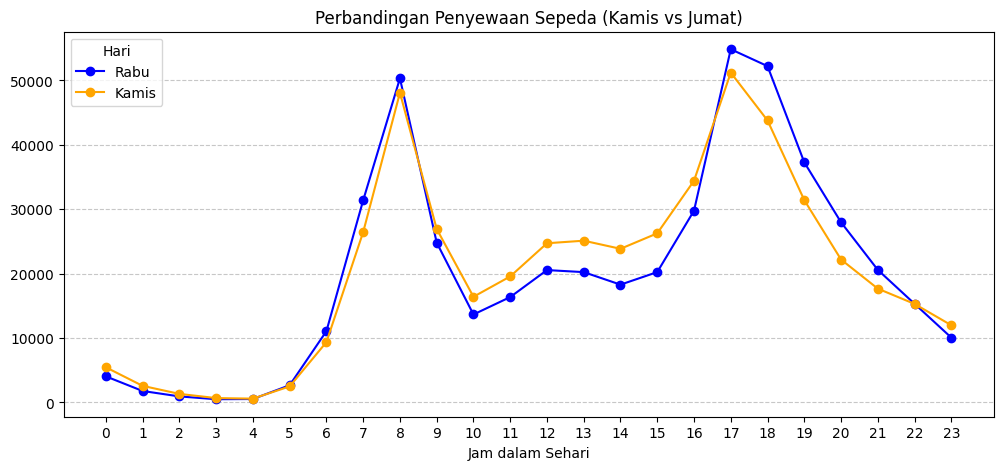

In [ ]:
# Filter data untuk Rabu dan Kamis
df_kamis = hour[hour["weekday"] == 4].groupby("hr")["cnt"].sum()
df_jumat = hour[hour["weekday"] == 5].groupby("hr")["cnt"].sum()

# Plot untuk Kamis
plt.figure(figsize=(12, 5))
plt.plot(df_kamis.index, df_kamis.values, marker="o", linestyle="-", color="blue", label="Rabu")
plt.title("Kenaikan dan Penurunan Jumlah Penyewaan Sepeda (Kamis)")
plt.xlabel("Jam dalam Sehari")
plt.xticks(range(0, 24))
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

# Plot untuk Jumat
plt.figure(figsize=(12, 5))
plt.plot(df_jumat.index, df_jumat.values, marker="o", linestyle="-", color="orange", label="Kamis")
plt.title("Kenaikan dan Penurunan Jumlah Penyewaan Sepeda (Jumat)")
plt.xlabel("Jam dalam Sehari")
plt.xticks(range(0, 24))
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

# Plot untuk melihat perbandingan Rabu dan Kamis dalam satu grafik
plt.figure(figsize=(12, 5))
plt.plot(df_kamis.index, df_kamis.values, marker="o", linestyle="-", color="blue", label="Rabu")
plt.plot(df_jumat.index, df_jumat.values, marker="o", linestyle="-", color="orange", label="Kamis")
plt.title("Perbandingan Penyewaan Sepeda (Kamis vs Jumat)")
plt.xlabel("Jam dalam Sehari")
plt.xticks(range(0, 24))
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.legend(title="Hari", loc="upper left")
plt.show()


**Interpretasi :** Pola kenaikan dan penurunan jumlah penyewaan sepeda pada hari Kamis dan Jumat menunjukkan tren yang mirip. Peak hour terjadi pada pukul 08:00 AM, yang kemungkinan besar bertepatan dengan jam berangkat kerja. Selain itu, terjadi lonjakan kembali pada pukul 05:00 PM dan 06:00 PM, yang dapat diasumsikan sebagai waktu pulang kerja.

### Pertanyaan 2: Bagaimana proporsi antara registered users dan casual users dalam penyewaan sepeda?

Pada tahapan sebelumnya, kita telah melakukan Exploratory Data Analysis, jadi sekarang kita tinggal menerapkan perhitungan tersebut ke dalam Pie Chart

#### **Proporsi Jumlah Casual vs Registered Users**

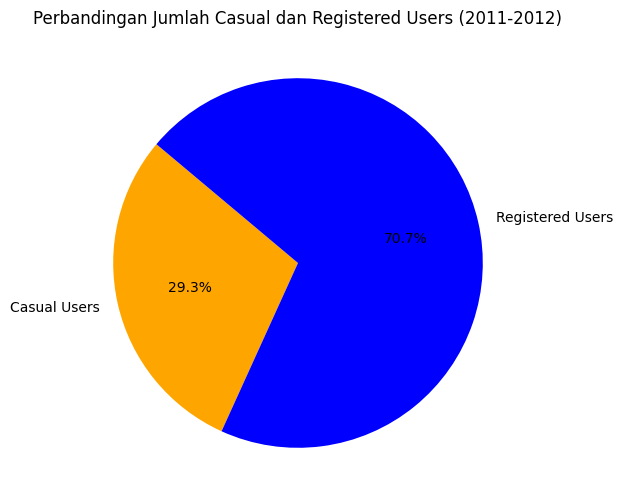

In [ ]:
# Plot Pie Chart
plt.figure(figsize=(6, 6))
plt.pie(unique_users_prop.squeeze(), labels=['Casual Users', 'Registered Users'], autopct='%1.1f%%', colors=['orange', 'blue'], startangle=140)
plt.title('Perbandingan Jumlah Casual dan Registered Users (2011-2012)')
plt.show()

**Interpretasi:**
Pada tahun 2011-2012, sebanyak 70.7% dari seluruh pengguna penyewaan sepeda berasal dari kategori Registered Users, sementara sisanya merupakan Casual Users.

#### **Proporsi Frekuensi Penyewaan Sepeda oleh Casual vs Registered Users**

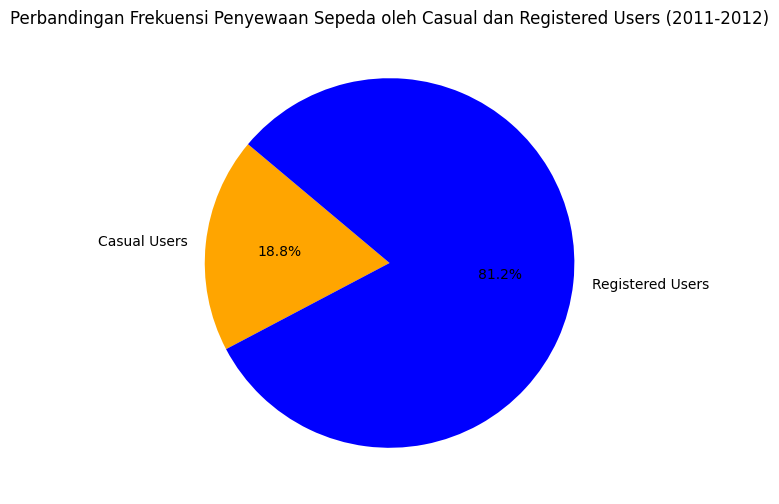

In [ ]:
# Plot Pie Chart
plt.figure(figsize=(6, 6))
plt.pie(users_frequency_prop.squeeze(), labels=['Casual Users', 'Registered Users'], autopct='%1.1f%%', colors=['orange', 'blue'], startangle=140)
plt.title('Perbandingan Frekuensi Penyewaan Sepeda oleh Casual dan Registered Users (2011-2012)')
plt.show()

**Interpretasi:**
Selama tahun 2011-2012, sekitar 80% dari total aktivitas penyewaan sepeda dilakukan oleh Registered Users.

### Pertanyaan 3: Bagaimana tren perfoma penyewaan sepeda dalam dua tahun terakhir (2011-2013)?

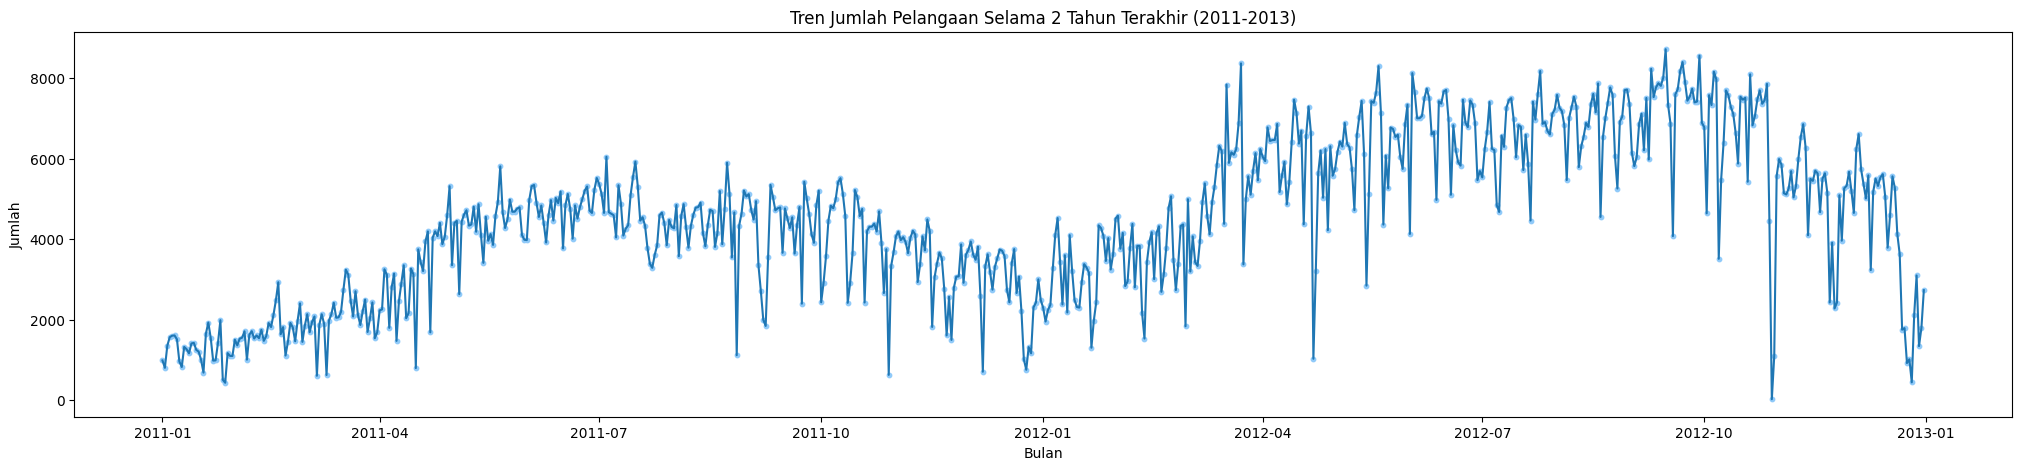

In [ ]:
plt.figure(figsize=(25, 5))

# Hitung jumlah penyewaan maksimum per bulan
monthly_counts = day['cnt'].groupby(day['dteday']).max()

# Buat line chart maksimum penyewaan per bulan
plt.scatter(monthly_counts.index, monthly_counts.values, c="#90CAF9", s=10, marker='o')
plt.plot(monthly_counts.index, monthly_counts.values)

plt.xlabel('Bulan')
plt.ylabel('Jumlah')
plt.title('Tren Jumlah Pelangaan Selama 2 Tahun Terakhir (2011-2013)')
plt.show()

**Interpretasi:** Jumlah penyewa sepeda cenderung fluktuatif setiap bulannya. Namun, secara keseluruhan, dalam dua tahun terakhir, tren penyewaan sepeda menunjukkan peningkatan, dengan pola kenaikan signifikan pada pertengahan tahun.

### Pertanyaan 4: Bagaimana hubungan antara faktor cuaca terhadap jumlah penyewaan sepeda?

Karena kita telah menghitung korelasi antara jumlah penyewa dengan suhu, humiditas, dan kecepatan angin pada kode sebelumnya, maka kita akan memvisualisasikannya dalam bentuk heatmap dan scatter plot

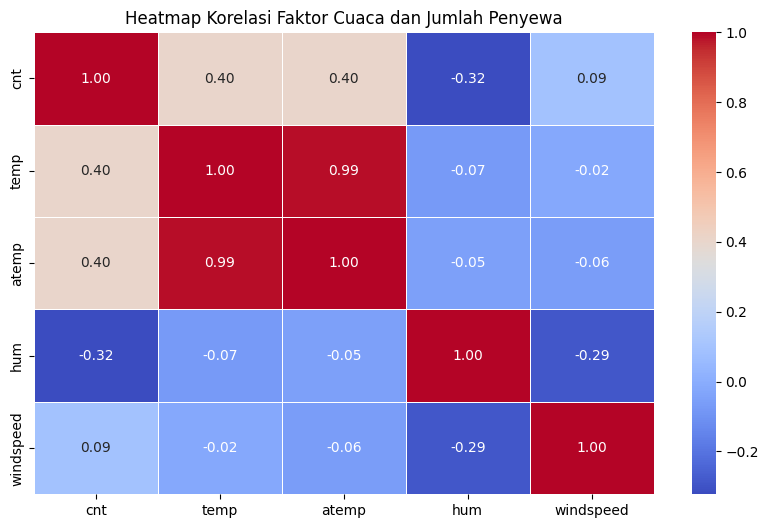

In [ ]:
# Correlation heatmap plot
plt.figure(figsize=(10, 6))
sns.heatmap(weather_and_count_corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Heatmap Korelasi Faktor Cuaca dan Jumlah Penyewa")
plt.show()

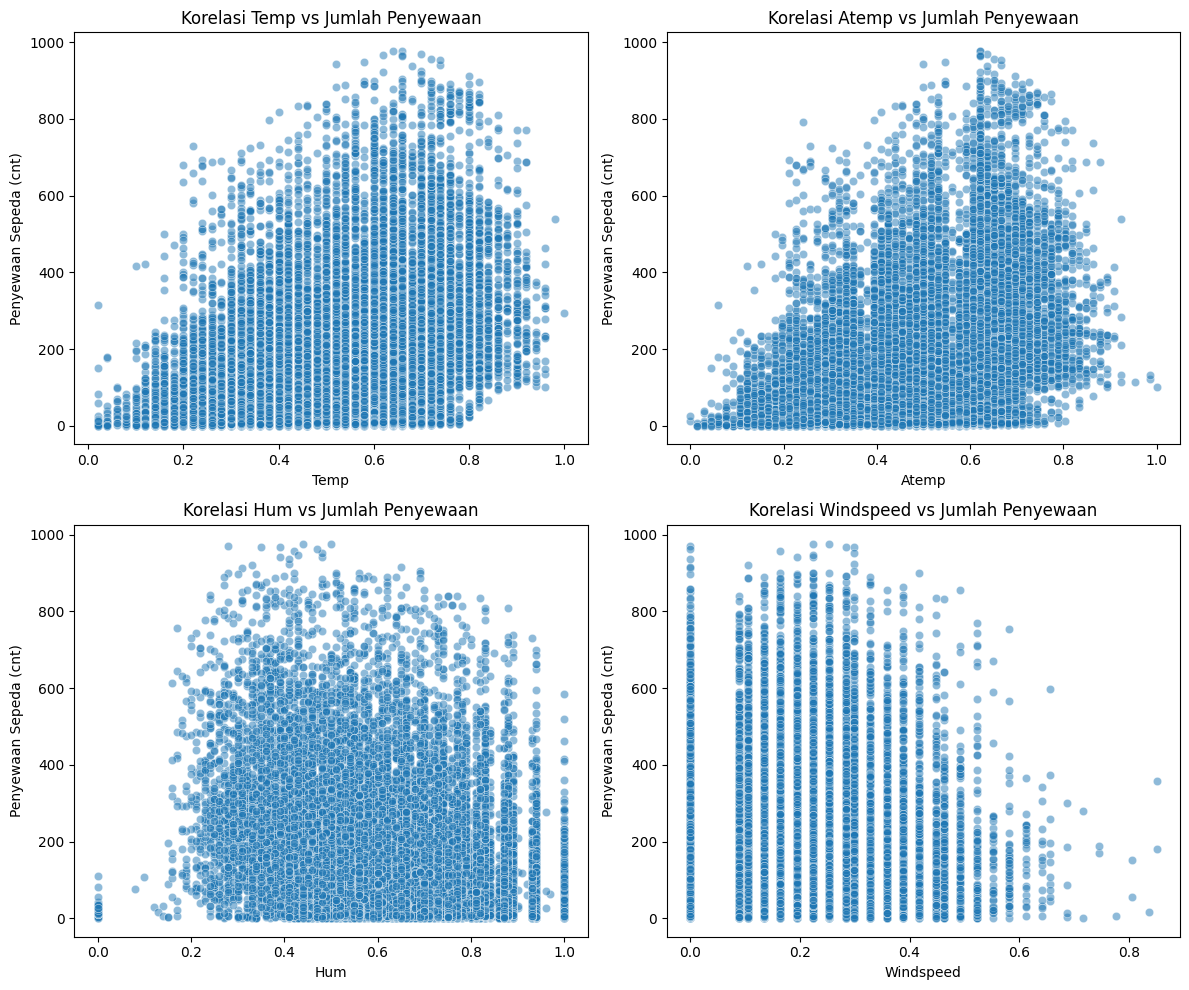

In [ ]:
# Atur ukuran figure
plt.figure(figsize=(12, 10))

# Looping untuk membuat scatter plot dalam grid 2x2
for i, col in enumerate(['temp', 'atemp', 'hum', 'windspeed'], 1):
    plt.subplot(2, 2, i)  # 2x2 grid
    sns.scatterplot(x=hour_subset[col], y=hour_subset['cnt'], alpha=0.5)
    plt.xlabel(col.capitalize())
    plt.ylabel("Penyewaan Sepeda (cnt)")
    plt.title(f"Korelasi {col.capitalize()} vs Jumlah Penyewaan")

# Menampilkan plot
plt.tight_layout()
plt.show()

**Interpretasi:**
- Korelasi antara jumlah penyewaan sepeda dengan Humidity, Windspeed, Temperature, dan Atemp cenderung berada pada tingkat rendah hingga sedang.
- Variabel suhu (baik Temp maupun Atemp) berkorelasi positif dengan jumlah penyewaan sepeda. Artinya, semakin tinggi suhu di suatu tempat, maka kecenderungan penyewaan sepeda akan meningkat
- Sedangkan itu, variabel humidity berkorelasi negatif dengan jumlah penyewaan sepeda, yang berarti semakin rendah humidity/kelembapan di hari itu, maka jumlah penyewaan sepeda akan meningkat.
- Sedangkan untuk windspeed/kecepatan angin, semakin rendah kecepatan angin di hari itu, maka jumlah penyewaan sepeda akan meningkat.

## Pengelompokan Rentang Suhu per Hari(Binning)

In [104]:
# Bins disesuaikan dengan rentang 0–1
# Dingin: < 15°C, Sedang: 15°C – 30°C, Ekstrem: > 30°C. Hasil dibawah merupakan hasil perkalian dari temperature normalisasi
bins = [0, 0.366, 0.732, 1.0]
labels = ['Dingin', 'Sedang', 'Ekstrem']

# Simpan hasil binning ke kolom baru
day['temp_category'] = pd.cut(day['temp'], bins=bins, labels=labels, include_lowest=True)

# Tampilkan hasil
print(day[['temp', 'temp_category']].head())

       temp temp_category
0  0.344167        Dingin
1  0.363478        Dingin
2  0.196364        Dingin
3  0.200000        Dingin
4  0.226957        Dingin


<ipython-input-103-5bf47468ebb0>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=temp_counts.index, y=temp_counts.values, palette=bar_colors, edgecolor="black")


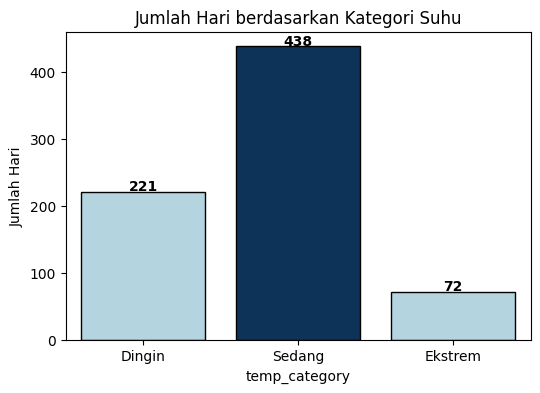

In [103]:
# Hitung jumlah hari dalam setiap kategori suhu
temp_counts = day["temp_category"].value_counts().sort_index()

# Warna dasar biru
base_color = "lightblue"  # Biru standar
highlight_color = "#003366"  # Biru tua untuk highlight
highlight_index = temp_counts.idxmax()  # Kategori dengan jumlah tertinggi

# Buat daftar warna: biru biasa, kecuali untuk kategori tertinggi pakai biru tua
bar_colors = [highlight_color if category == highlight_index else base_color for category in temp_counts.index]

# Plot bar chart dengan warna yang sudah diatur
plt.figure(figsize=(6, 4))
sns.barplot(x=temp_counts.index, y=temp_counts.values, palette=bar_colors, edgecolor="black")

# Tambahkan label
plt.title("Jumlah Hari berdasarkan Kategori Suhu")
plt.ylabel("Jumlah Hari")

# Tambahkan angka di atas tiap bar
for i, v in enumerate(temp_counts):
    plt.text(i, v + 2, str(v), ha="center", fontsize=10, fontweight="bold")

# Tampilkan plot
plt.show()

**Interpretasi:** Hari dimana para penyewa melakukan penyewaan sepeda ini banyak dilakukan di hari dengan suhu sedang, yang dalam rentang normalisasi berada pada angka 0.366-0.732 atau pada rentang biasa di angka 15-30 derajat

## Conclusion

1. Bagaimana pola jumlah penyewaan sepeda berdasarkan hari dan jam tertentu?
2. Bagaimana proporsi antara registered users dan casual users dalam penyewaan sepeda?
3. Bagaimana tren perfoma penyewaan sepeda dalam dua tahun terakhir (2011-2013)
4. Bagaimana hubungan antara faktor cuaca terhadap jumlah penyewaan sepeda?

**Jawaban**
1. Jumlah penyewaan sepeda dalam dua tahun terakhir paling banyak ada di hari Kamis dan Jumat, dimana peak hour untuk peminjaman sepeda ada di jam 8 pagi dan 5 sore. Sementara itu, hari Minggu memiliki jumlah penyewaan terendah dibandingkan hari lainnya.
2. Pada tahun 2011-2012, sebanyak 70.7% dari seluruh pengguna penyewaan sepeda berasal dari kategori Registered Users, sementara sisanya merupakan Casual Users (19.7%). Dan selama tahun 2011-2012, sekitar 81.2% dari total aktivitas penyewaan sepeda dilakukan oleh Registered Users.
3. Jumlah penyewa sepeda cenderung fluktuatif setiap bulannya. Namun, secara keseluruhan, dalam dua tahun terakhir, tren penyewaan sepeda menunjukkan peningkatan, dengan pola kenaikan signifikan pada pertengahan tahun.
4. Penjelasan
    - Korelasi antara jumlah penyewaan sepeda dengan Humidity, Windspeed, Temperature, dan Atemp cenderung berada pada tingkat rendah hingga sedang.
    - Variabel suhu (baik Temp maupun Atemp) berkorelasi positif dengan jumlah penyewaan sepeda. Artinya, semakin tinggi suhu di suatu tempat, maka kecenderungan penyewaan sepeda akan meningkat
    - Sedangkan itu, variabel humidity berkorelasi negatif dengan jumlah penyewaan sepeda, yang berarti semakin rendah humidity/kelembapan di hari itu, maka jumlah penyewaan sepeda akan meningkat.
    - Sedangkan untuk windspeed/kecepatan angin, semakin rendah kecepatan angin di hari itu, maka jumlah penyewaan sepeda akan meningkat.